# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Reading dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Analysis

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
df['Outcome'].value_counts().to_frame()

,Outcome
0,500
1,268


### It indicates that there are 500 people who do not have diabetes,whereas there are 268 people who have diabetes.

# Data Visualization

In [10]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

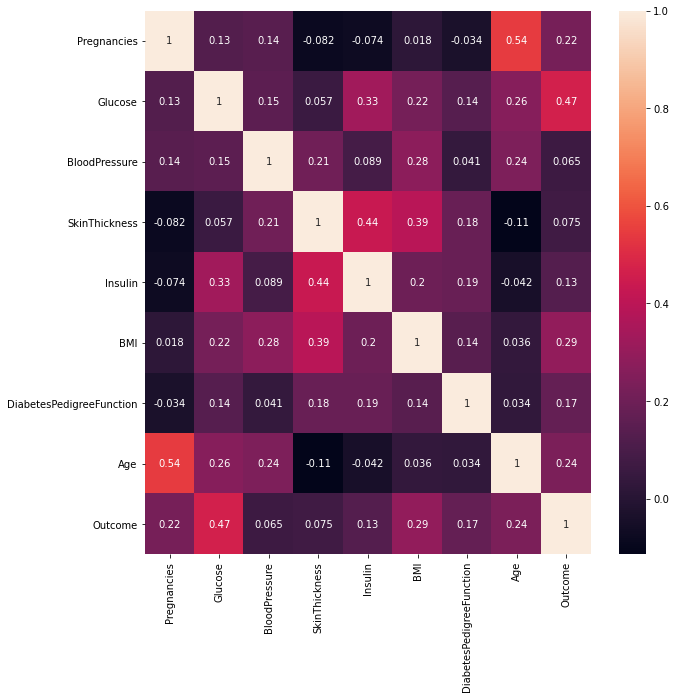

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

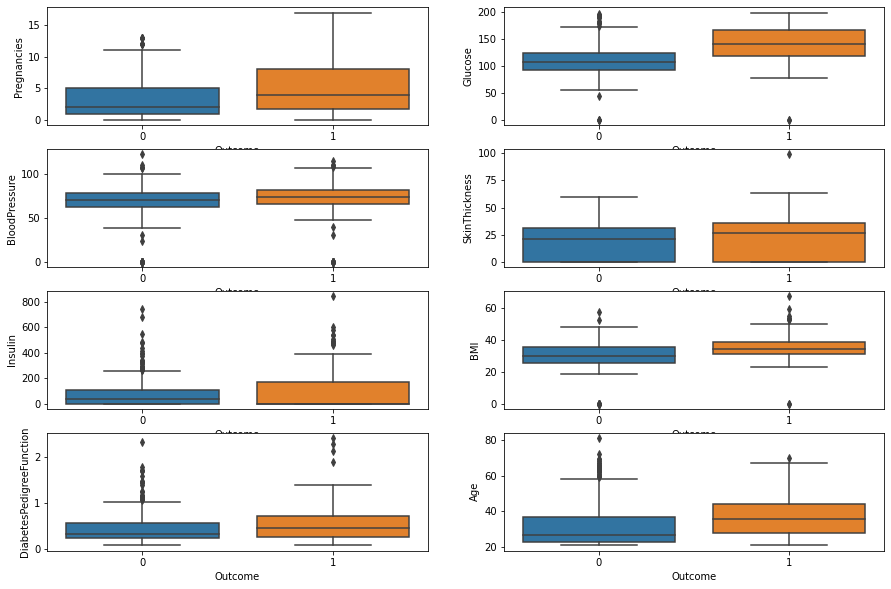

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(4,2,1)
sns.boxplot(x='Outcome', y = 'Pregnancies', data=df)

plt.subplot(4,2,2)
sns.boxplot(x='Outcome', y = 'Glucose', data=df)

plt.subplot(4,2,3)
sns.boxplot(x='Outcome', y = 'BloodPressure', data=df)

plt.subplot(4,2,4)
sns.boxplot(x='Outcome', y = 'SkinThickness', data=df)

plt.subplot(4,2,5)
sns.boxplot(x='Outcome', y = 'Insulin', data=df)

plt.subplot(4,2,6)
sns.boxplot(x='Outcome', y = 'BMI', data=df)

plt.subplot(4,2,7)
sns.boxplot(x='Outcome', y = 'DiabetesPedigreeFunction', data=df)

plt.subplot(4,2,8)
sns.boxplot(x='Outcome', y = 'Age', data=df)

plt.show()

# Pre-processing: Feature selection/extraction

In [13]:
Feature = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
Feature.drop(['Outcome'], axis = 1,inplace=True)
Feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
x=Feature
x[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y = df['Outcome'].values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

# Train Test Split AND Normalize Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


In [18]:
sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

# Classification

### In machine learning classification is a supervised learning approach which can be thought of as a means of categorizing or classifying some unknown items into a discrete set of classes.

# K Nearest Neighbor(KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k=6
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=6)


In [21]:
yhat=neigh.predict(x_test)
yhat[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [22]:
from sklearn import metrics
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Test set accuracy: 0.7662337662337663


In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))#The numpy.zeros() function returns a new array of given shape and type, with zeros.
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7012987 , 0.75974026, 0.73376623, 0.75324675, 0.72727273,
       0.76623377, 0.75324675, 0.75324675, 0.75324675])

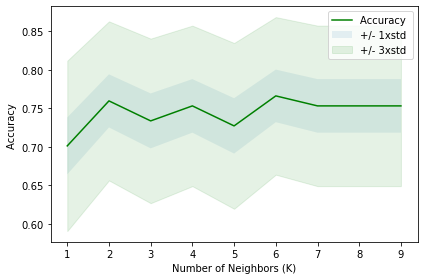

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7662337662337663 with k= 6


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
outcomeTree=DecisionTreeClassifier(criterion="entropy",max_depth=4).fit(x_train,y_train)
print(outcomeTree)

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [28]:
yhat=outcomeTree.predict(x_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
from sklearn import metrics
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Test set accuracy: 0.7792207792207793


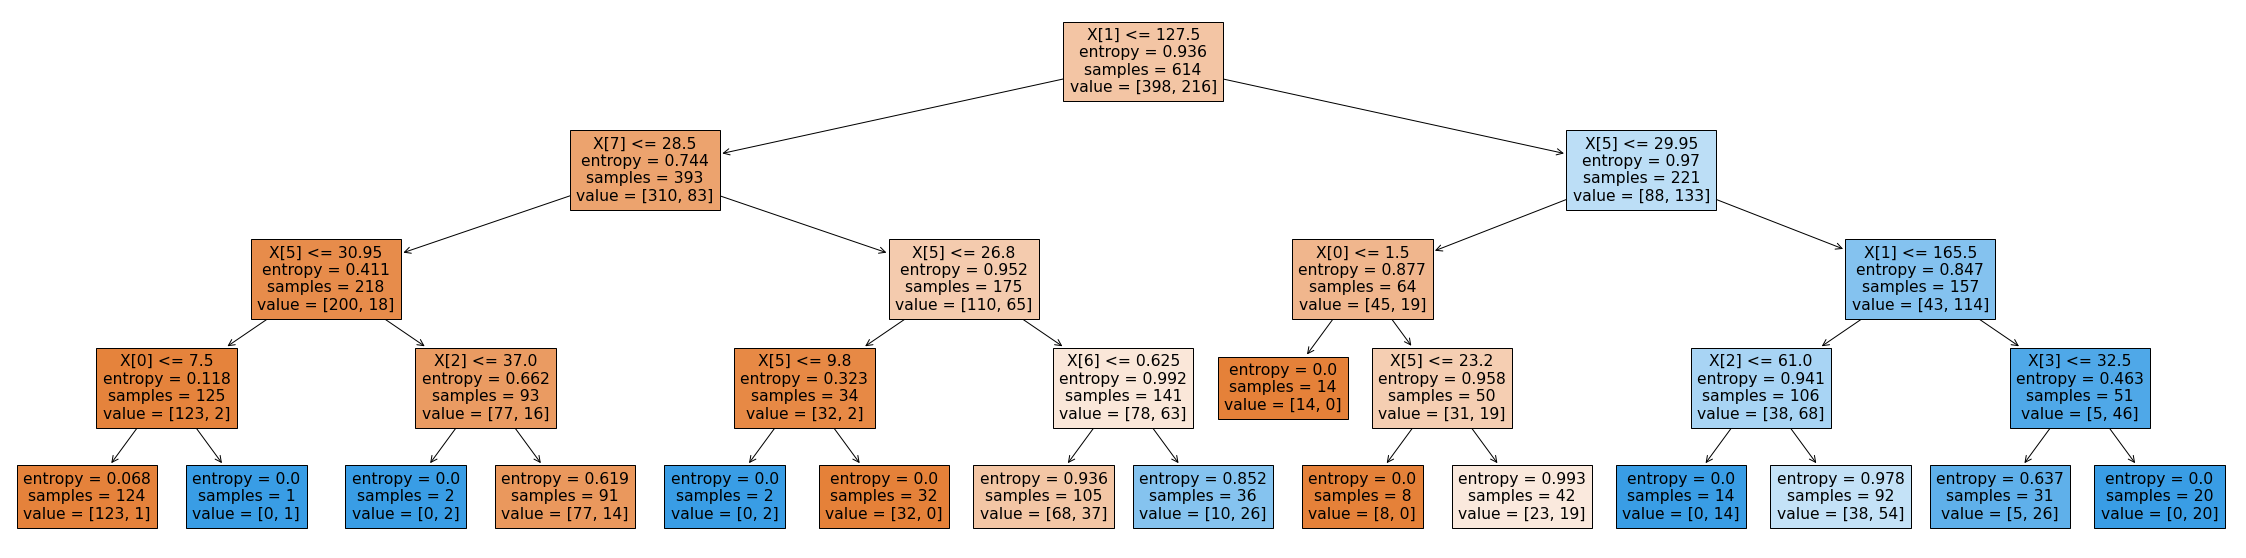

In [30]:
from sklearn import tree
plt.figure(figsize=(40,10))
tree.plot_tree(outcomeTree,filled=True)
plt.show()


# Support Vector Machine

In [31]:
from sklearn import svm

In [32]:
clf=svm.SVC(kernel='rbf').fit(x_train,y_train)

In [33]:
yhat=clf.predict(x_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [34]:
from sklearn import metrics
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Test set accuracy: 0.8181818181818182


# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LR= LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [37]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [38]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.70831592, 0.29168408],
       [0.71859942, 0.28140058],
       [0.76092242, 0.23907758],
       [0.75386754, 0.24613246],
       [0.76214444, 0.23785556],
       [0.49637602, 0.50362398],
       [0.51422098, 0.48577902],
       [0.3384363 , 0.6615637 ],
       [0.23252779, 0.76747221],
       [0.55468061, 0.44531939],
       [0.8540953 , 0.1459047 ],
       [0.7958761 , 0.2041239 ],
       [0.85912381, 0.14087619],
       [0.81073803, 0.18926197],
       [0.69956284, 0.30043716],
       [0.67569329, 0.32430671],
       [0.48099949, 0.51900051],
       [0.54888921, 0.45111079],
       [0.79653352, 0.20346648],
       [0.81870557, 0.18129443],
       [0.75342657, 0.24657343],
       [0.39258461, 0.60741539],
       [0.61258198, 0.38741802],
       [0.58551289, 0.41448711],
       [0.52259582, 0.47740418],
       [0.79648885, 0.20351115],
       [0.67858566, 0.32141434],
       [0.17954722, 0.82045278],
       [0.83050832, 0.16949168],
       [0.62570324, 0.37429676],
       [0.

In [39]:
from sklearn import metrics
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Test set accuracy: 0.7207792207792207
